In [37]:
"""we will import all data here and launch all functionality"""
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
import pickle

In [38]:
# Convert balanced csv into dataframe and seperate labels
DATASET_PATH = "/Users/connormaclachlan/Desktop/CS433_Project/Code/audio_features5.csv"
df = pd.read_csv(DATASET_PATH)
data = df.iloc[:,:-1]
labels = df.iloc[:,-1]

# Binarize labels
lb = preprocessing.LabelBinarizer()
lb.fit(labels)
labels = lb.transform(labels)
labels = labels.ravel()

data

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.458555,0.019645,3001.354791,3344.517129,5534.632735,0.078978,-359.40960,137.64343,-37.699123,6.325547,...,-9.760785,-6.768481,-3.511393,-3.748340,-3.967702,-10.396973,-2.482264,-6.162936,-4.923035,-11.189392
1,0.464076,0.014318,2727.966517,3355.361293,5111.337925,0.064329,-390.26126,141.90009,-27.839031,9.437146,...,-10.102802,-6.653375,-3.374868,-3.704915,-2.511039,-9.781481,-2.933311,-6.106406,-4.896005,-11.024654
2,0.484786,0.009045,3107.355612,3969.098026,6465.931280,0.065080,-456.10266,133.50476,-11.117912,14.982422,...,-10.706840,-6.763403,-3.531775,-3.923490,-2.337104,-8.130886,-2.786967,-5.898662,-4.085208,-9.087442
3,0.478862,0.009569,3312.825733,4015.887142,6800.919974,0.075007,-455.28723,128.96028,-13.122722,23.113510,...,-10.924266,-7.216356,-5.256391,-5.810167,-3.952243,-9.662618,-2.115171,-5.361967,-1.982848,-9.893876
4,0.449824,0.014388,3138.301541,3554.610188,5831.376262,0.080952,-409.34323,127.41835,-12.608589,29.327412,...,-13.284443,-9.627606,-5.086654,-5.323502,-6.410156,-9.247939,-3.309547,-3.999227,-2.692699,-10.764003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5907,0.409185,0.067176,2614.758586,2886.698400,5214.357565,0.065293,-328.55112,141.53745,-22.659441,13.024714,...,-6.717110,-1.697525,-3.740438,-3.175358,-0.975767,-0.465912,-2.515925,-2.404339,0.966102,-4.774403
5908,0.390581,0.073916,2457.173609,2869.278324,4877.645216,0.057779,-326.41880,145.77818,-25.167551,8.504569,...,-5.317368,-1.120305,-3.904533,-2.995485,-0.848178,-0.912807,-3.697724,-2.362756,0.633791,-3.956865
5909,0.388144,0.068845,2258.660148,2789.668381,4219.333728,0.052754,-329.84766,153.84966,-26.846690,-1.657135,...,-4.487367,0.013983,-3.089279,-1.760390,0.131551,-1.194933,-4.528350,-3.063631,-0.315218,-3.612579
5910,0.400583,0.064557,2303.049530,2882.060450,4471.237232,0.052277,-341.36500,151.41124,-19.925772,0.934836,...,-5.056502,0.127086,-3.819226,-2.195555,0.904972,-0.282693,-3.279342,-2.018431,-0.554217,-4.517551


In [39]:
# Convert data into tensorflow dataset
def convertToDataset(data, labels):
    return tf.data.Dataset.zip(tf.data.Dataset.from_tensor_slices(data), tf.data.Dataset.from_tensor_slices(labels))

# Process dataset
def processData(data, labels):
    data = tf.abs(data)
    data = tf.expand_dims(data, axis=1)
    return data, labels

In [40]:
# Split data into training and testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=42)

trainDataset = convertToDataset(X_train, y_train)
testDataset = convertToDataset(X_test, y_test)

In [41]:
trainDataset.as_numpy_iterator().next()

(array([ 4.34771500e-01,  2.88258340e-02,  2.95657240e+03,  3.12244336e+03,
         5.69613706e+03,  7.52296692e-02, -3.32747860e+02,  1.42060130e+02,
        -5.10173840e+01,  2.65516720e+01, -2.30403400e+01,  1.31221510e+01,
        -4.83686160e+00, -1.63952080e+01, -5.59854100e+00, -1.61675110e+01,
        -1.58248260e+00, -1.81260410e+01, -1.98251720e+00, -2.50885060e+00,
        -8.38363600e+00, -1.18850960e+00, -7.47049760e+00,  3.05572150e-01,
        -5.17679900e+00, -4.52124500e+00]),
 1)

In [42]:
X_train.shape

(4138, 26)

In [43]:
# Hyperparameters
opt = optimizers.Adam(learning_rate=0.001)
epochs = 100
batch = 32
prefetch = 16

In [44]:
# Data processing
trainDataset = trainDataset.map(processData)
trainDataset = trainDataset.cache()
trainDataset = trainDataset.batch(batch)
trainDataset = trainDataset.prefetch(prefetch)

testDataset = testDataset.map(processData)
testDataset = testDataset.cache()
testDataset = testDataset.batch(batch)
testDataset = testDataset.prefetch(prefetch)

X_val = abs(X_val)

In [45]:
# Define the NN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(26,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=opt, loss='BinaryCrossentropy', metrics=['accuracy'])

# Train the model
model.fit(trainDataset, epochs=epochs)

# Evaluate the model
test_loss, test_acc = model.evaluate(testDataset)

print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

Epoch 1/100
130/130 [==============================] - 3s 5ms/step - loss: 8.9972 - accuracy: 0.7687
Epoch 2/100
130/130 [==============================] - 1s 5ms/step - loss: 0.3211 - accuracy: 0.9021
Epoch 3/100
130/130 [==============================] - 0s 4ms/step - loss: 0.3129 - accuracy: 0.9041
Epoch 4/100
130/130 [==============================] - 1s 4ms/step - loss: 0.3095 - accuracy: 0.9053
Epoch 5/100
130/130 [==============================] - 1s 4ms/step - loss: 0.2995 - accuracy: 0.9065
Epoch 6/100
130/130 [==============================] - 0s 4ms/step - loss: 3.3160 - accuracy: 0.7869
Epoch 7/100
130/130 [==============================] - 1s 4ms/step - loss: 2.0765 - accuracy: 0.8347
Epoch 8/100
130/130 [==============================] - 1s 4ms/step - loss: 1.6501 - accuracy: 0.8400
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 0.7246 - accuracy: 0.8729
Epoch 10/100
130/130 [==============================] - 1s 4ms/step - loss: 0.7904 - accura

6/6 [==============================] - 0s 3ms/step


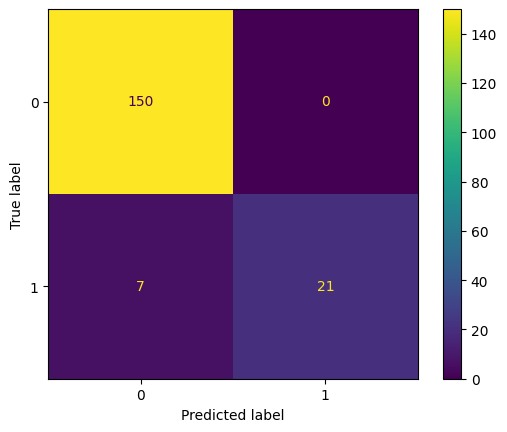

In [46]:
# Model given validation data to make prediction
predicted = model.predict(np.array(X_val))
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_val)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [47]:
# Validation percentage
predictPerc = (conf_mat[0][0]+conf_mat[1][1])/(conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0]+conf_mat[1][1])*100
print(f"Prediction Accuracy: {predictPerc}%")

Prediction Accuracy: 96.06741573033707%


In [48]:
# # Saving the Trained Model
# model_file = "DeepVoiceModel.pkl"

# with open(model_file, "wb") as file:
#     pickle.dump(model, file)